# Marks signal


📂 Processing DNase (X1) ...

📂 Processing DNase (X2) ...

📂 Processing DNase (X3) ...

📂 Processing H3K27ac (X1) ...

📂 Processing H3K27ac (X2) ...

📂 Processing H3K27ac (X3) ...

📂 Processing H3K4me3 (X1) ...

📂 Processing H3K4me3 (X2) ...

📂 Processing H3K4me3 (X3) ...

📂 Processing H3K27me3 (X1) ...

📂 Processing H3K27me3 (X2) ...

📂 Processing H3K27me3 (X3) ...

📂 Processing H3K36me3 (X1) ...

📂 Processing H3K36me3 (X2) ...

📂 Processing H3K36me3 (X3) ...

📂 Processing H3K4me1 (X1) ...

📂 Processing H3K4me1 (X2) ...

📂 Processing H3K4me1 (X3) ...

📂 Processing H3K9me3 (X1) ...

📂 Processing H3K9me3 (X2) ...

📂 Processing H3K9me3 (X3) ...


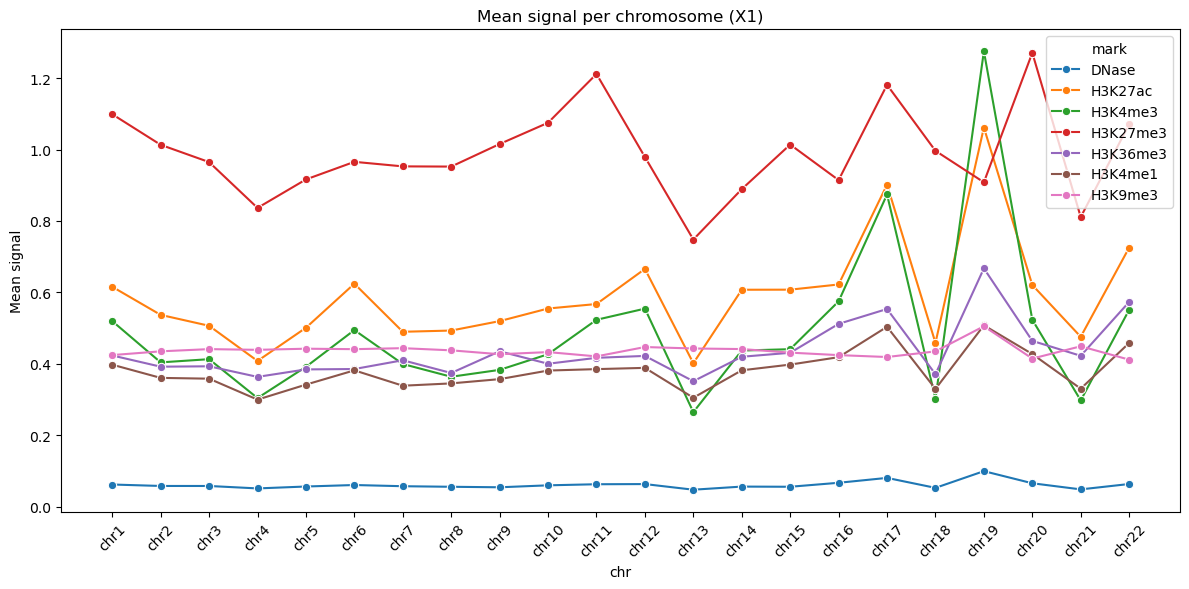

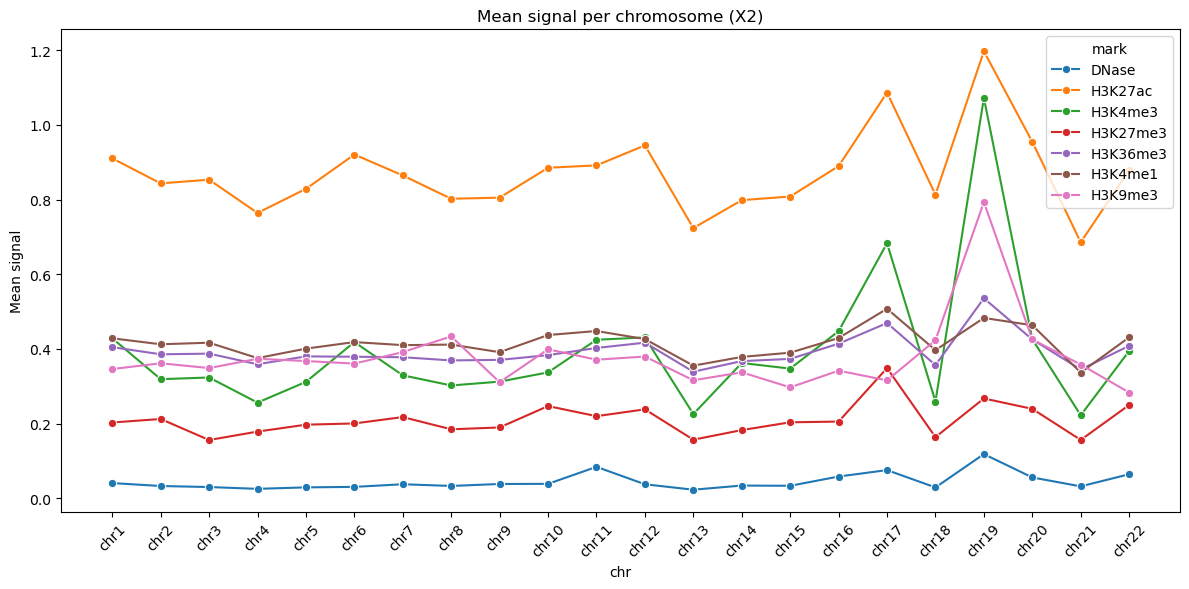

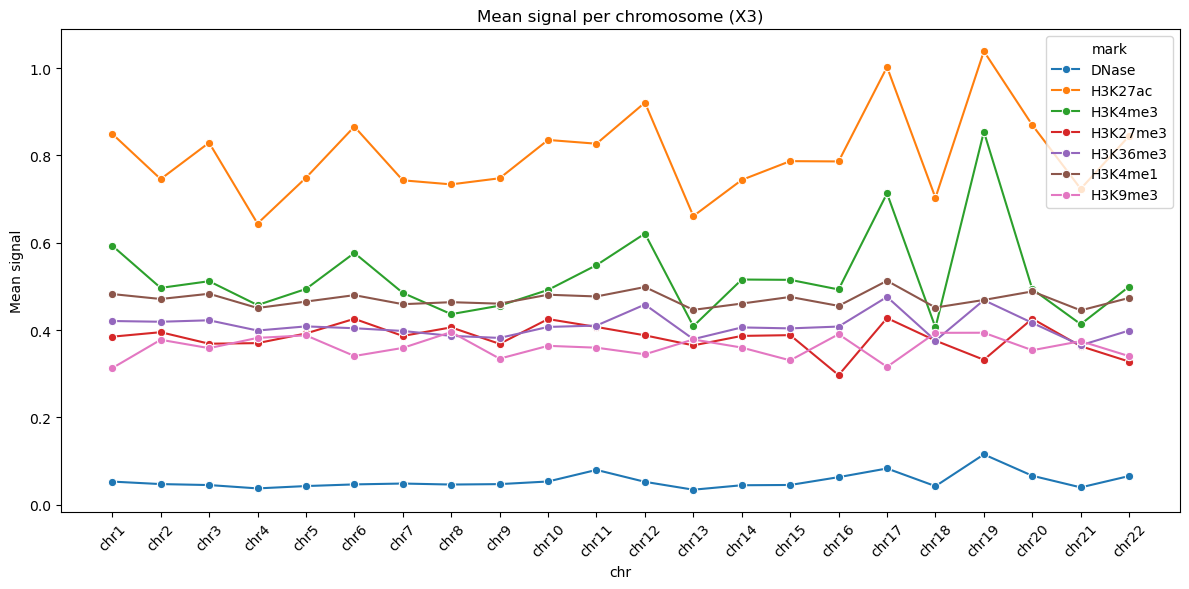

In [ ]:
import os
import numpy as np
import pandas as pd
import pyBigWig
import matplotlib.pyplot as plt
import seaborn as sns

# === 基本設定 ===
base = "../ML4G_Project_1_Data"
marks = ["DNase", "H3K27ac", "H3K4me3", "H3K27me3", "H3K36me3", "H3K4me1", "H3K9me3"]
cells = ["X1", "X2", "X3"]
target_chroms = [f"chr{i}" for i in range(1, 23)]

summary_chr = []

# === 計算每個 chromosome 的平均 signal ===
for mark in marks:
    for cell in cells:
        path_bw = os.path.join(base, f"{mark}-bigwig", f"{cell}.bw")
        if not os.path.exists(path_bw):
            path_bw = os.path.join(base, f"{mark}-bigwig", f"{cell}.bigwig")
        if not os.path.exists(path_bw):
            print(f"⚠️ Missing: {mark} ({cell})")
            continue

        print(f"\n📂 Processing {mark} ({cell}) ...")
        bw = pyBigWig.open(path_bw)
        chroms = bw.chroms()

        for chrom in target_chroms:
            if chrom not in chroms:
                continue

            vals = np.array(bw.values(chrom, 0, chroms[chrom], numpy=True))
            vals = vals[~np.isnan(vals)]
            if len(vals) == 0:
                continue

            summary_chr.append({
                "mark": mark,
                "cell": cell,
                "chr": chrom,
                "mean": np.mean(vals),
                "std": np.std(vals)
            })
        bw.close()

# # === 轉成 DataFrame ===
df_chr = pd.DataFrame(summary_chr)

# ======================================================
# 📊 可視化 1：每個 cell 各 mark 在各 chr 的平均值
# ======================================================
for cell in cells:
    df_sub = df_chr[df_chr["cell"] == cell]
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_sub, x="chr", y="mean", hue="mark", marker="o")
    plt.xticks(rotation=45)
    plt.title(f"Mean signal per chromosome ({cell})")
    plt.ylabel("Mean signal")
    plt.tight_layout()
    plt.show()



📂 Processing DNase (X1) ...

📂 Processing DNase (X2) ...

📂 Processing DNase (X3) ...

📂 Processing H3K27ac (X1) ...

📂 Processing H3K27ac (X2) ...

📂 Processing H3K27ac (X3) ...

📂 Processing H3K4me3 (X1) ...

📂 Processing H3K4me3 (X2) ...

📂 Processing H3K4me3 (X3) ...

📂 Processing H3K27me3 (X1) ...

📂 Processing H3K27me3 (X2) ...

📂 Processing H3K27me3 (X3) ...

📂 Processing H3K36me3 (X1) ...

📂 Processing H3K36me3 (X2) ...

📂 Processing H3K36me3 (X3) ...

📂 Processing H3K4me1 (X1) ...

📂 Processing H3K4me1 (X2) ...

📂 Processing H3K4me1 (X3) ...

📂 Processing H3K9me3 (X1) ...

📂 Processing H3K9me3 (X2) ...

📂 Processing H3K9me3 (X3) ...
✅ Created df_chr with 462 rows and columns: ['mark', 'cell', 'chr', 'linear_mean', 'linear_std', 'log1p_mean', 'log1p_std']


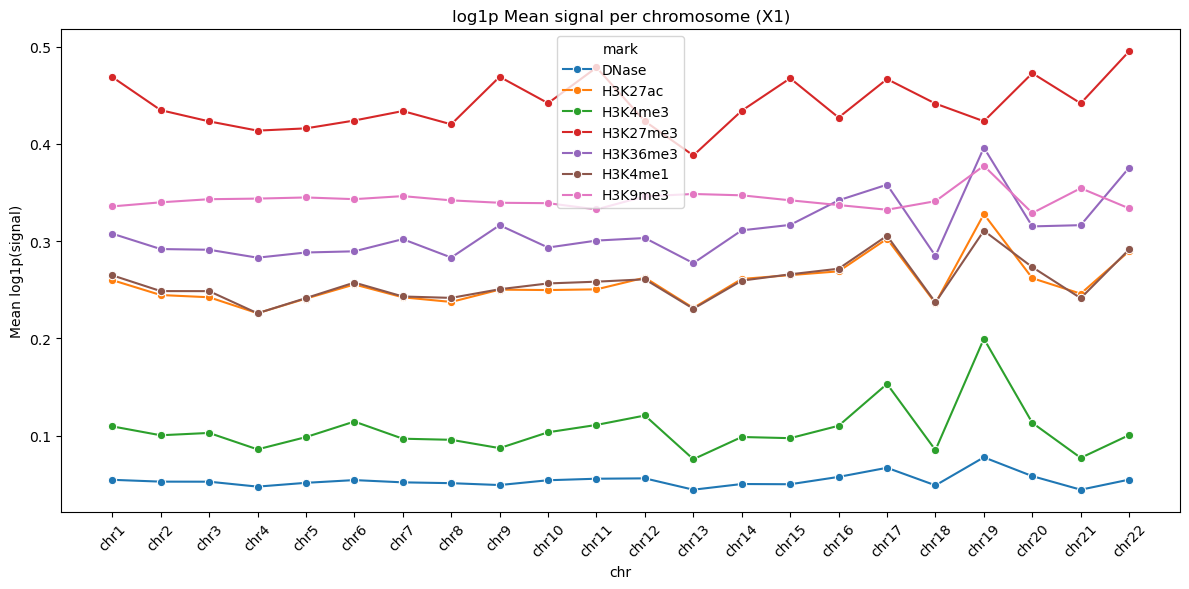

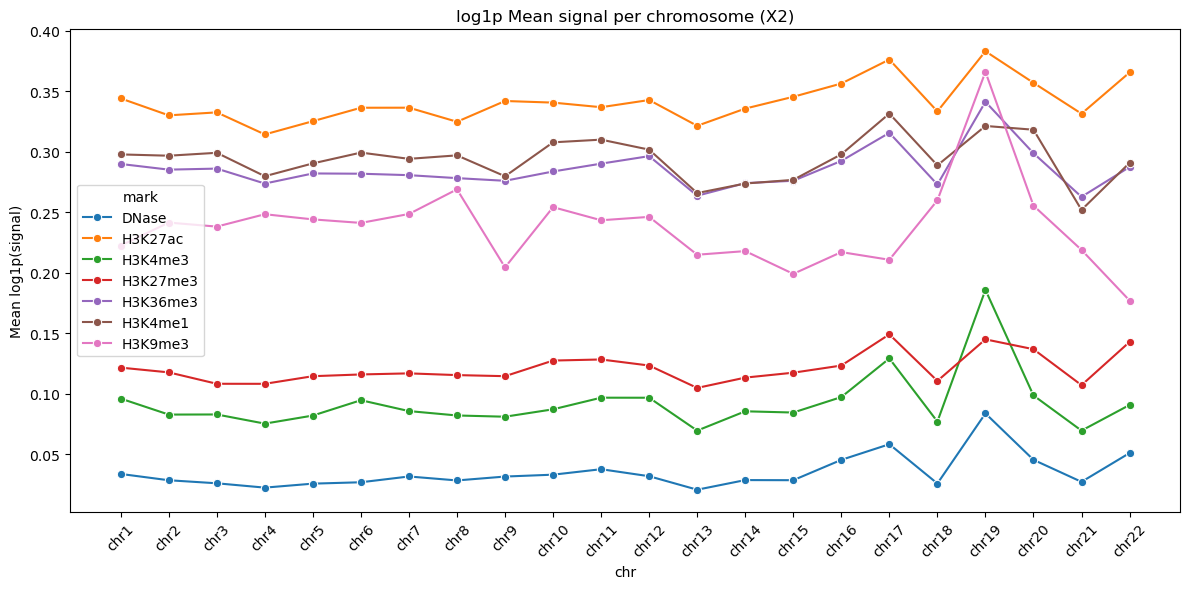

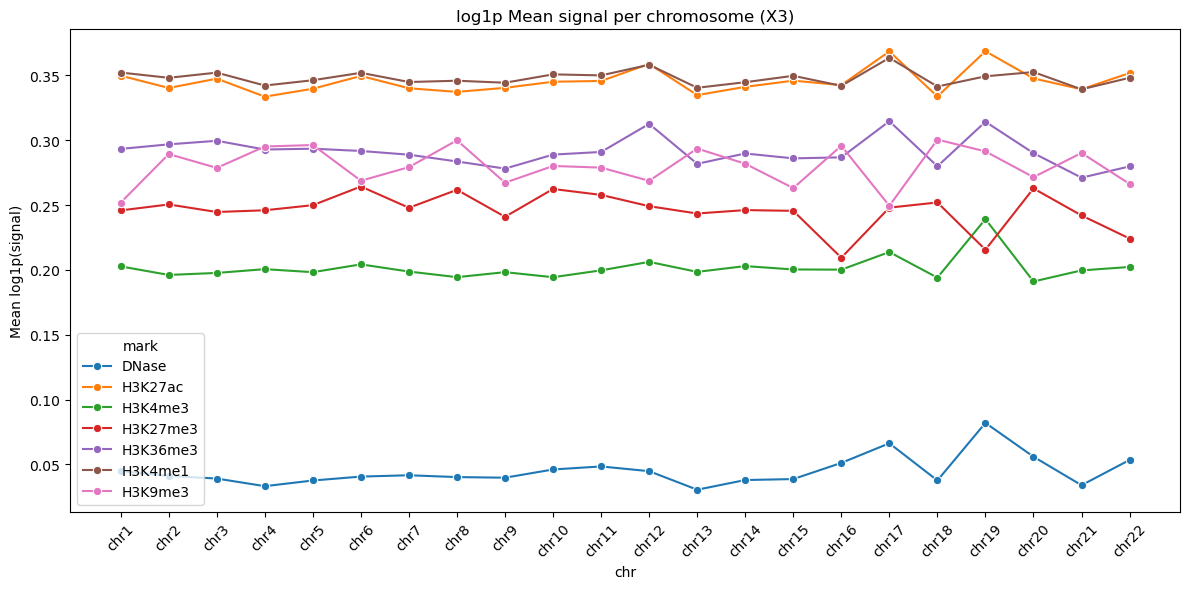

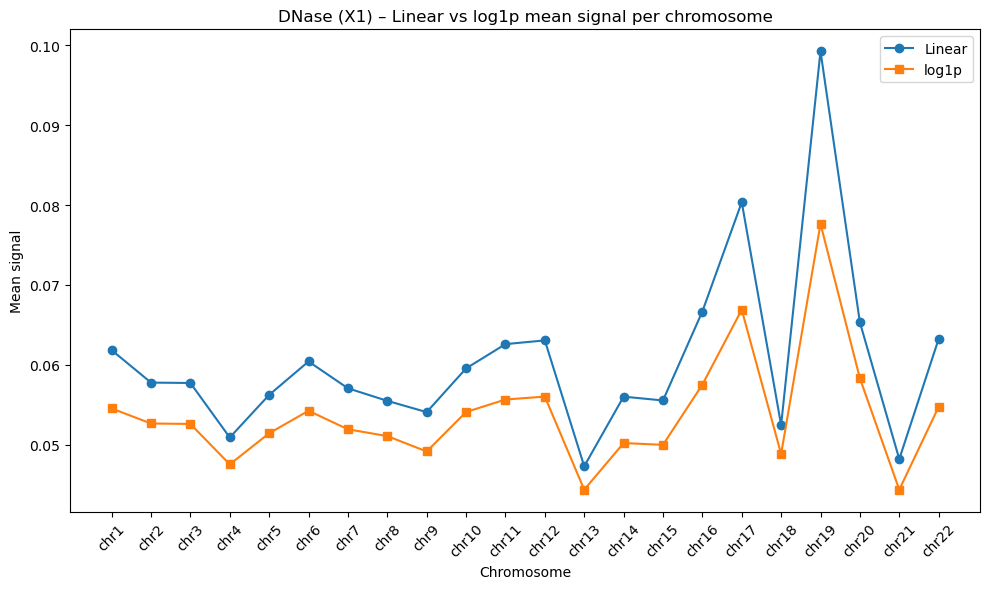

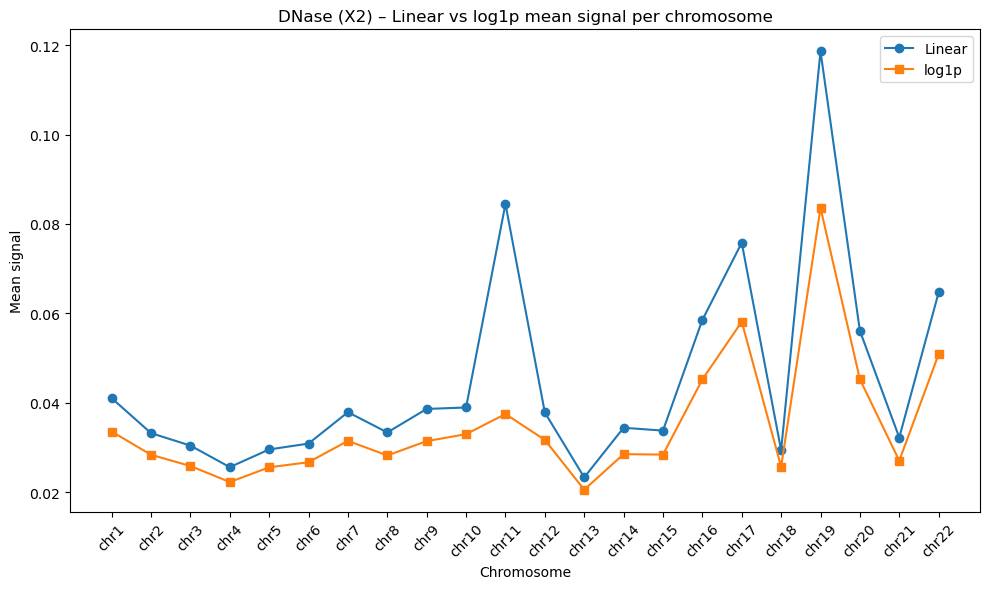

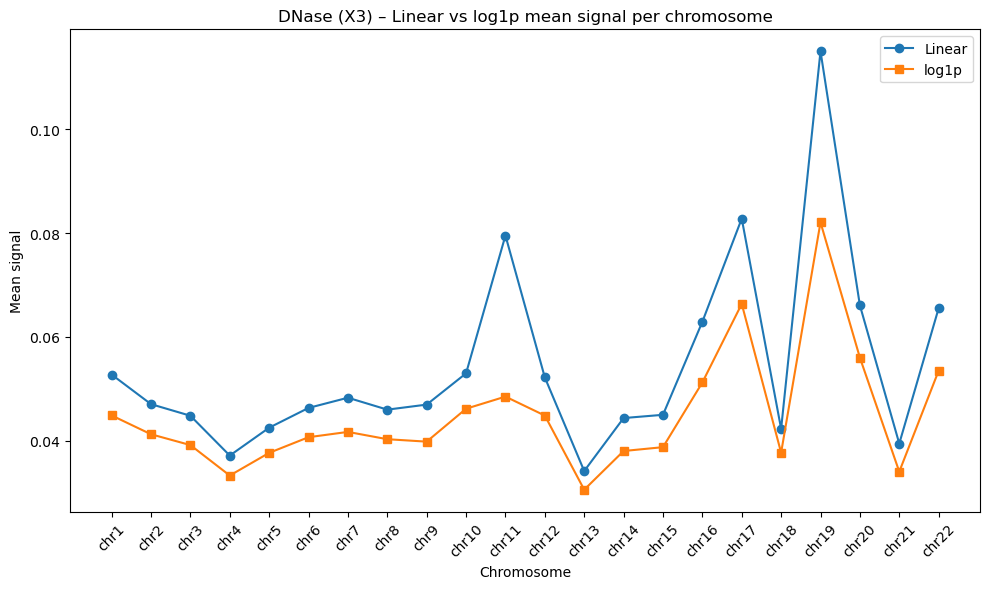

In [ ]:
import os
import numpy as np
import pandas as pd
import pyBigWig
import matplotlib.pyplot as plt
import seaborn as sns

# === 基本設定 ===
base = "../ML4G_Project_1_Data"
marks = ["DNase", "H3K27ac", "H3K4me3", "H3K27me3", "H3K36me3", "H3K4me1", "H3K9me3"]
cells = ["X1", "X2", "X3"]
target_chroms = [f"chr{i}" for i in range(1, 23)]

summary_chr = []

# === 計算每個 chromosome 的平均 signal (linear + log1p) ===
for mark in marks:
    for cell in cells:
        path_bw = os.path.join(base, f"{mark}-bigwig", f"{cell}.bw")
        if not os.path.exists(path_bw):
            path_bw = os.path.join(base, f"{mark}-bigwig", f"{cell}.bigwig")
        if not os.path.exists(path_bw):
            print(f"⚠️ Missing: {mark} ({cell})")
            continue

        print(f"\n📂 Processing {mark} ({cell}) ...")
        bw = pyBigWig.open(path_bw)
        chroms = bw.chroms()

        for chrom in target_chroms:
            if chrom not in chroms:
                continue

            vals = np.array(bw.values(chrom, 0, chroms[chrom], numpy=True))
            vals = vals[~np.isnan(vals)]
            if len(vals) == 0:
                continue

            # --- log1p normalization ---
            vals_log1p = np.log1p(vals)

            summary_chr.append({
                "mark": mark,
                "cell": cell,
                "chr": chrom,
                "linear_mean": np.mean(vals),
                "linear_std": np.std(vals),
                "log1p_mean": np.mean(vals_log1p),
                "log1p_std": np.std(vals_log1p)
            })
        bw.close()

# === 轉成 DataFrame ===
df_chr = pd.DataFrame(summary_chr)
print(f"✅ Created df_chr with {len(df_chr)} rows and columns: {df_chr.columns.tolist()}")

# ======================================================
# 📊 可視化 1：每個 cell 各 mark 在各 chr 的平均值（log1p）
# ======================================================
for cell in cells:
    df_sub = df_chr[df_chr["cell"] == cell]
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_sub, x="chr", y="log1p_mean", hue="mark", marker="o")
    plt.xticks(rotation=45)
    plt.title(f"log1p Mean signal per chromosome ({cell})")
    plt.ylabel("Mean log1p(signal)")
    plt.tight_layout()
    plt.show()

# ======================================================
# 📊 可視化 2：比較 linear vs log1p（以 DNase 為例）
# ======================================================
for cell in cells:
    df_sub = df_chr[(df_chr["cell"] == cell) & (df_chr["mark"] == "DNase")]

    plt.figure(figsize=(10, 6))
    plt.plot(df_sub["chr"], df_sub["linear_mean"], label="Linear", marker="o")
    plt.plot(df_sub["chr"], df_sub["log1p_mean"], label="log1p", marker="s")
    plt.title(f"DNase ({cell}) – Linear vs log1p mean signal per chromosome")
    plt.ylabel("Mean signal")
    plt.xlabel("Chromosome")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
df_chr.to_csv("chromosome_signal_summary.tsv", sep="\t", index=False)
df_chr

,mark,cell,chr,linear_mean,linear_std,log1p_mean,log1p_std
0,DNase,X1,chr1,0.061842,0.385774,0.054532,0.084974
1,DNase,X1,chr2,0.057774,0.132467,0.052653,0.071263
2,DNase,X1,chr3,0.057726,0.141006,0.052596,0.070716
3,DNase,X1,chr4,0.050898,0.099826,0.047532,0.056042
4,DNase,X1,chr5,0.056235,0.128560,0.051428,0.068877
...,...,...,...,...,...,...,...
457,H3K9me3,X3,chr18,0.393580,0.421573,0.300559,0.230698
458,H3K9me3,X3,chr19,0.393797,0.521961,0.291451,0.254966
459,H3K9me3,X3,chr20,0.353707,0.421490,0.271565,0.227950
460,H3K9me3,X3,chr21,0.374454,0.420065,0.290238,0.212159


In [ ]:
df_merged = df_chr.groupby("chr", as_index=False).agg({
    "log1p_mean": "mean",
    "log1p_std": "mean"
}).merge(results_df, on="chr", how="inner")


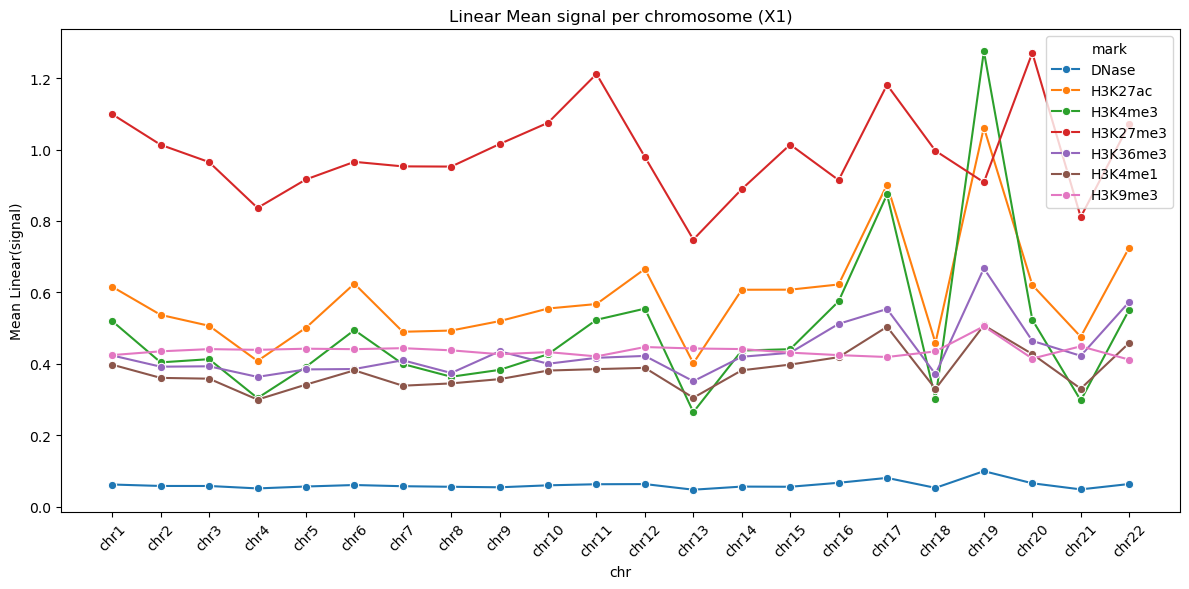

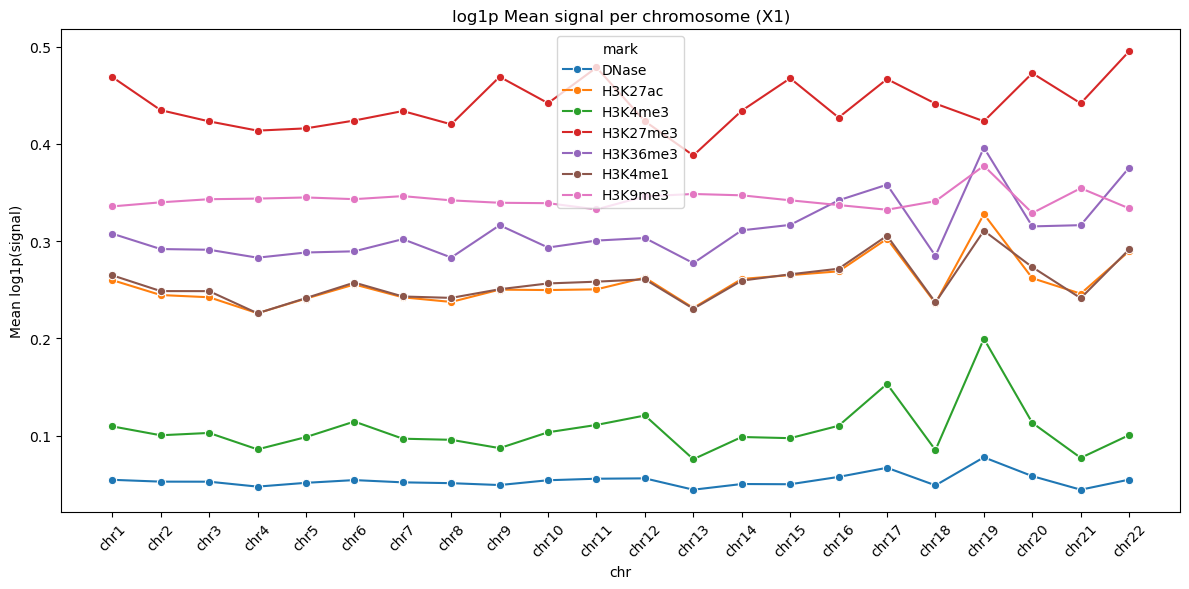

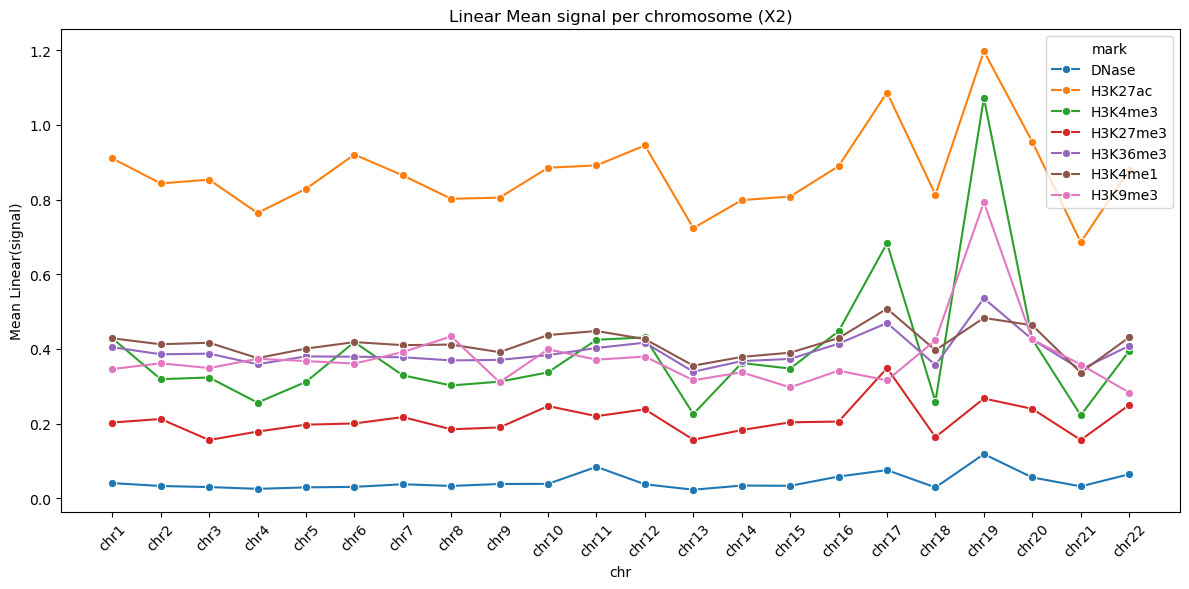

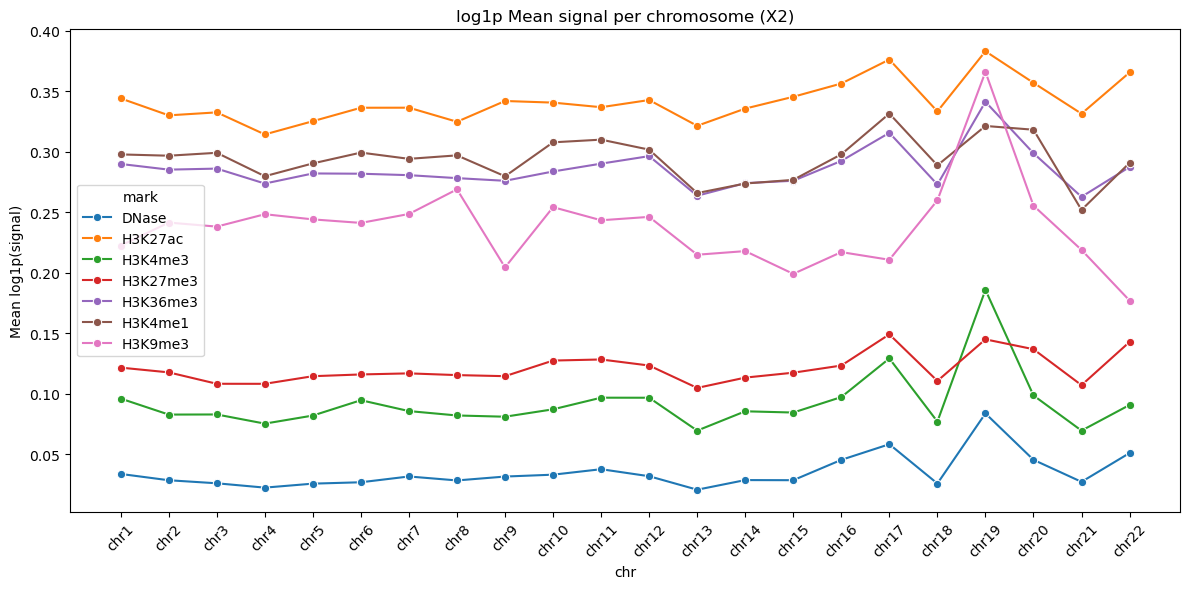

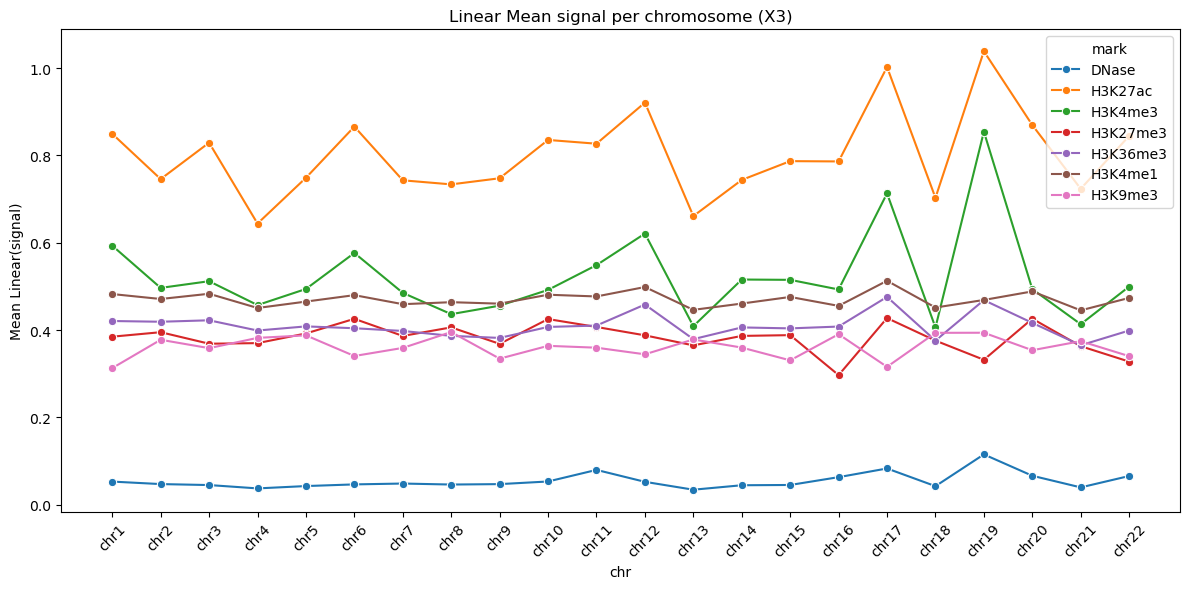

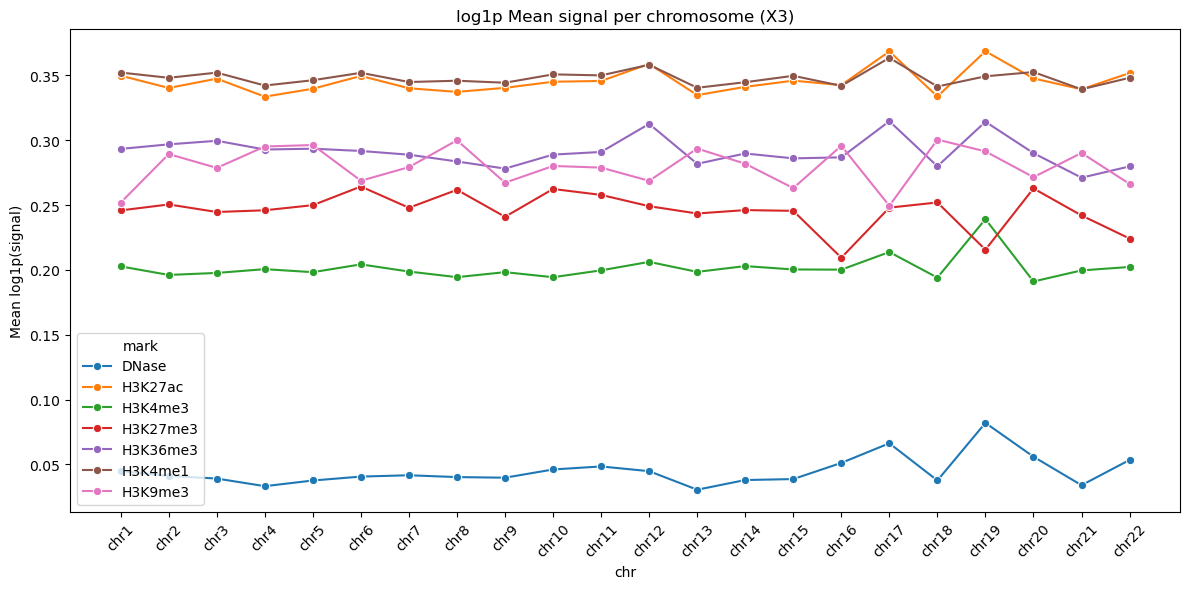

In [ ]:
for cell in cells:
    df_sub = df_chr[df_chr["cell"] == cell]
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_sub, x="chr", y="linear_mean", hue="mark", marker="o")
    plt.xticks(rotation=45)
    plt.title(f"Linear Mean signal per chromosome ({cell})")
    plt.ylabel("Mean Linear(signal)")
    plt.tight_layout()
    plt.show()
    df_sub = df_chr[df_chr["cell"] == cell]
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_sub, x="chr", y="log1p_mean", hue="mark", marker="o")
    plt.xticks(rotation=45)
    plt.title(f"log1p Mean signal per chromosome ({cell})")
    plt.ylabel("Mean log1p(signal)")
    plt.tight_layout()
    plt.show()

📘 Available normalization types: ['linear', 'log1p']
✅ 已完成 linear 與 log1p 兩種 z-score 計算
    mark cell   chr  linear_mean  linear_std  log1p_mean  log1p_std  \
0  DNase   X1  chr1     0.061842    0.385774    0.054532   0.084974   
1  DNase   X1  chr2     0.057774    0.132467    0.052653   0.071263   
2  DNase   X1  chr3     0.057726    0.141006    0.052596   0.070716   
3  DNase   X1  chr4     0.050898    0.099826    0.047532   0.056042   
4  DNase   X1  chr5     0.056235    0.128560    0.051428   0.068877   

  z_mean_linear z_std_linear z_mean_log1p z_std_log1p  
0      0.014128     2.009844     0.018972    1.085407  
1     -0.007063     0.690138    -0.005033    0.910274  
2     -0.007314     0.734628    -0.005762    0.903278  
3     -0.042886     0.520084     -0.07045    0.715851  
4     -0.015082     0.669784    -0.020678    0.879787  


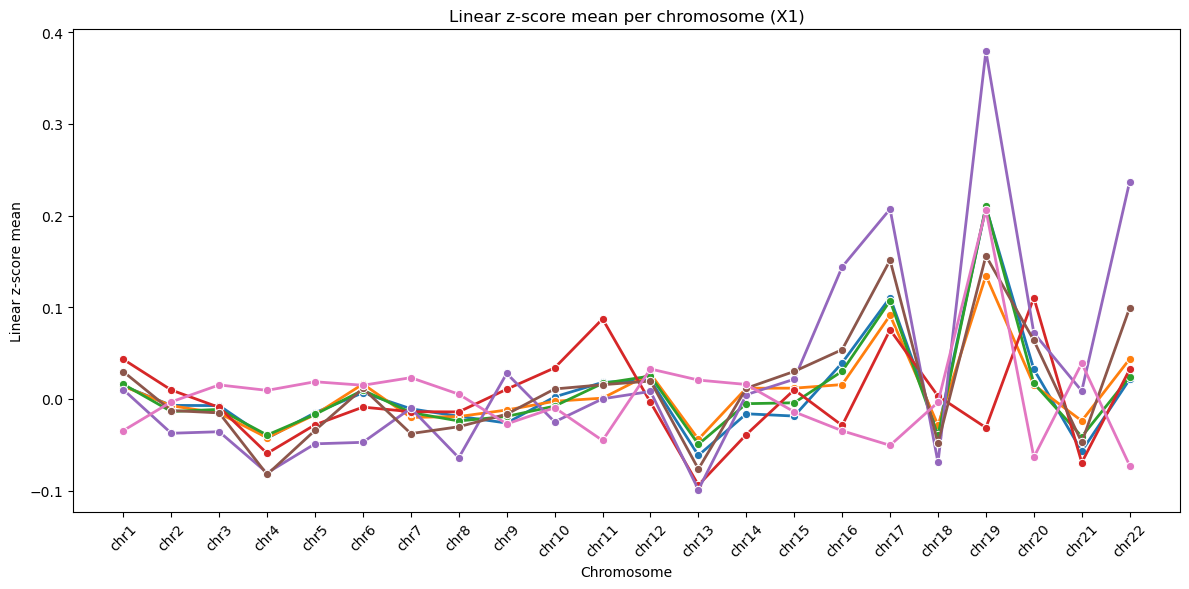

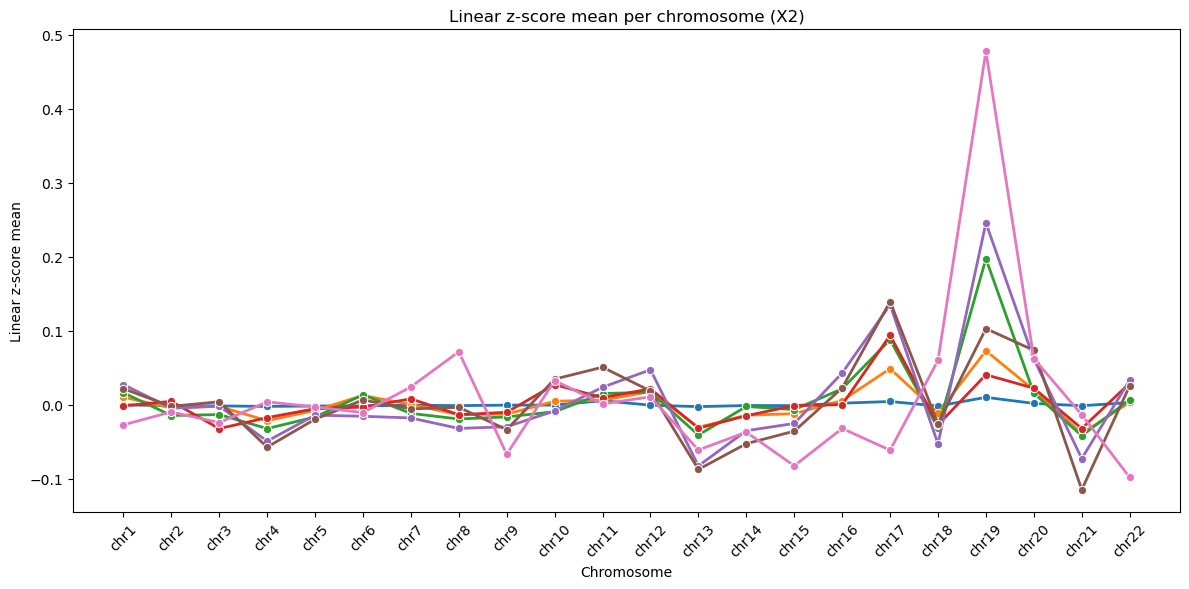

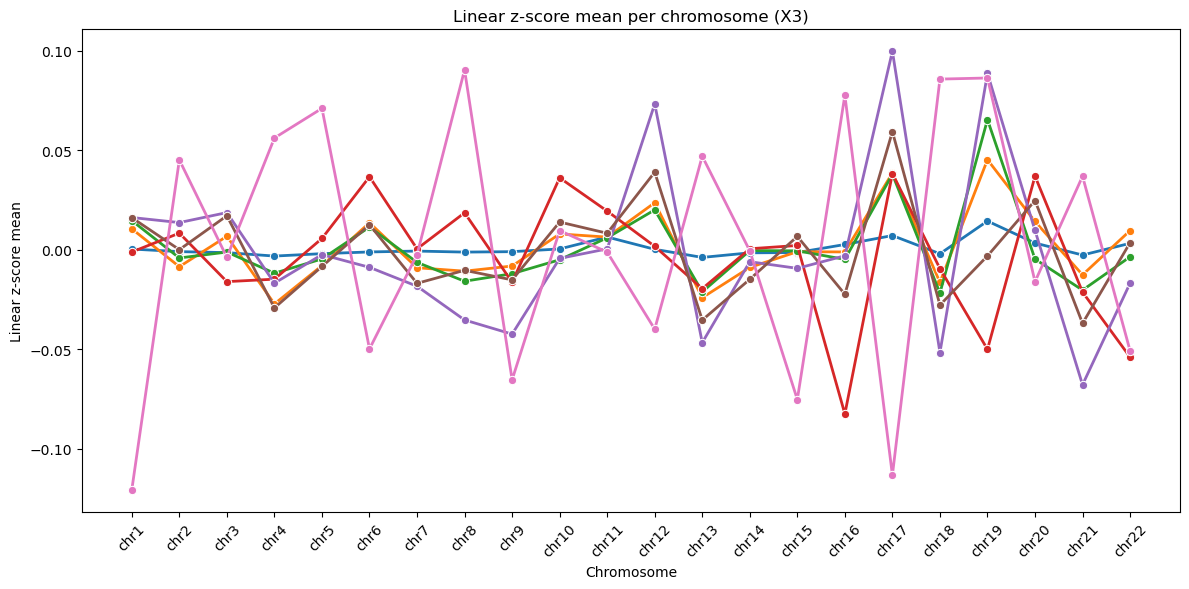

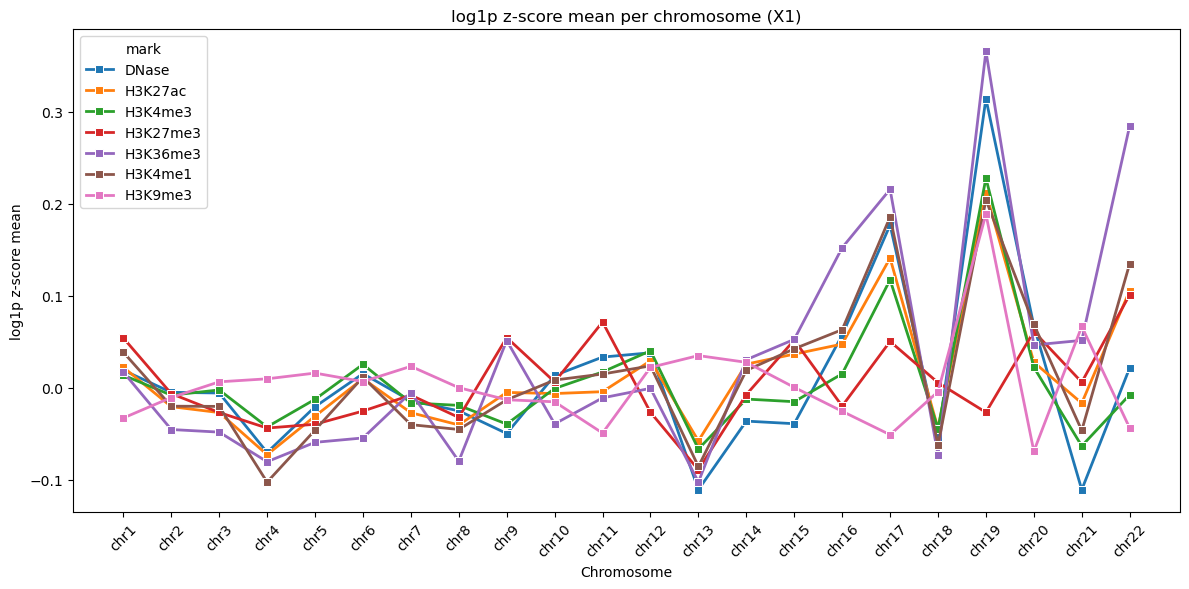

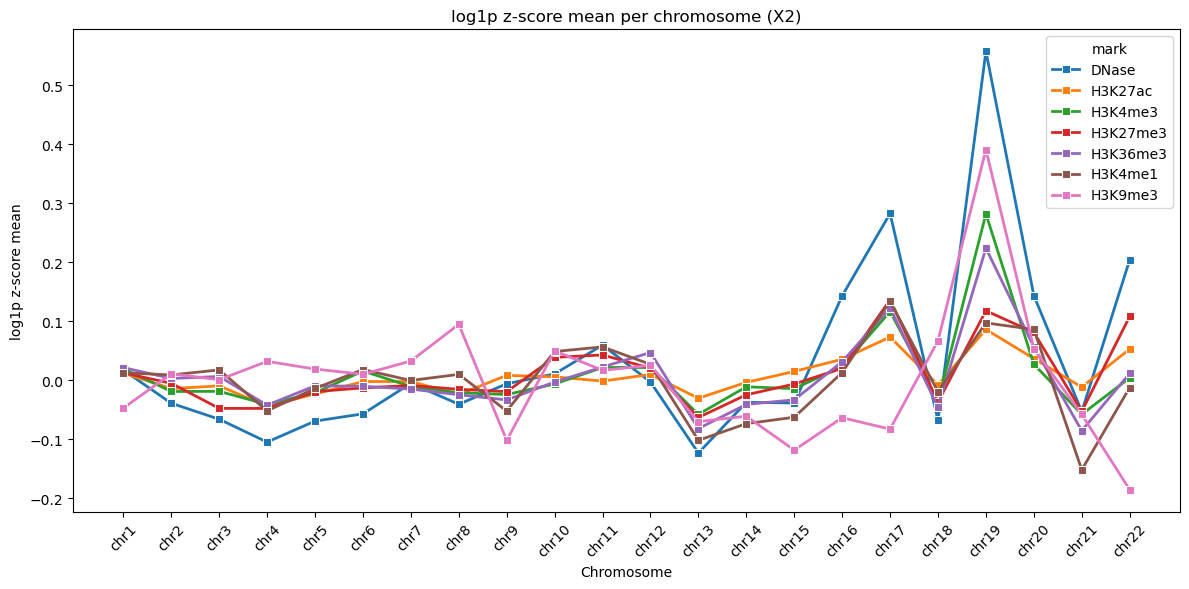

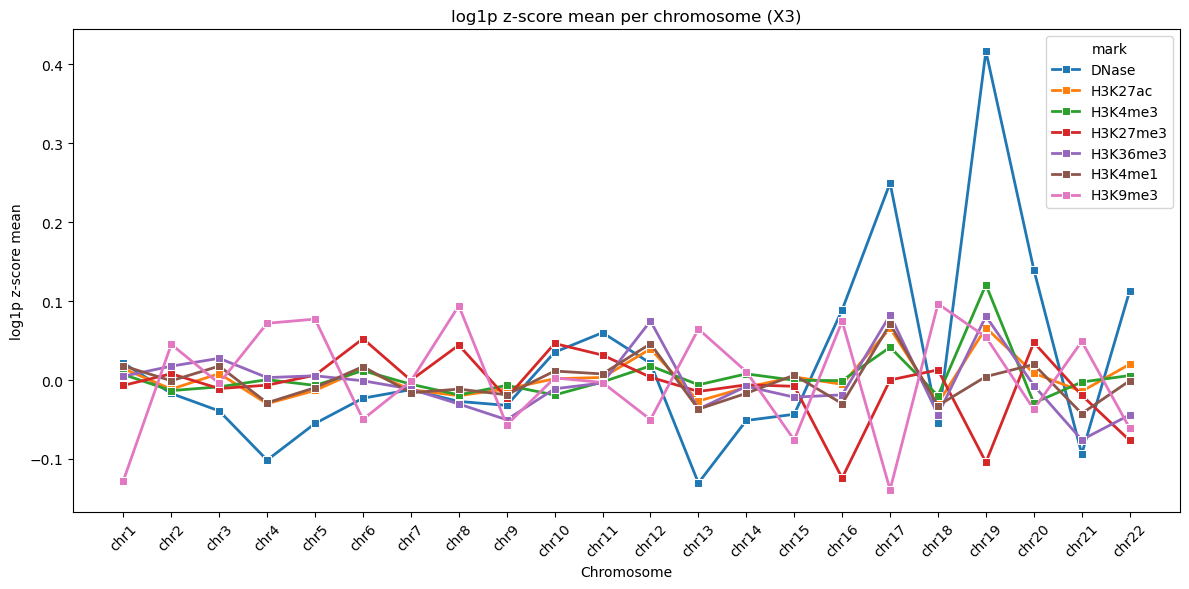

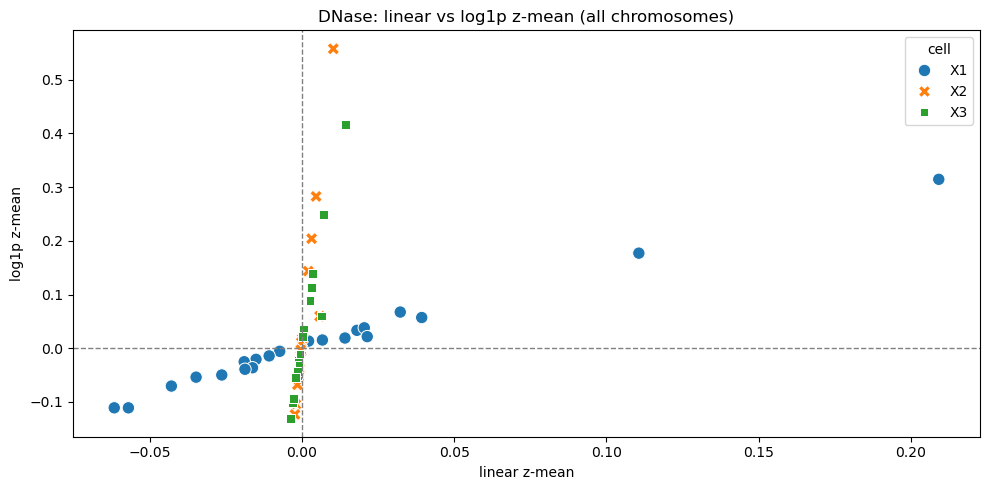

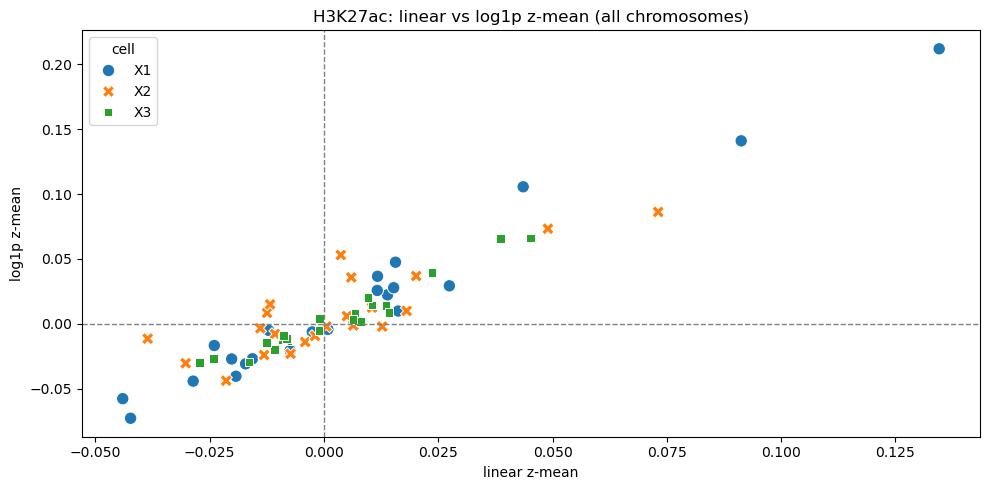

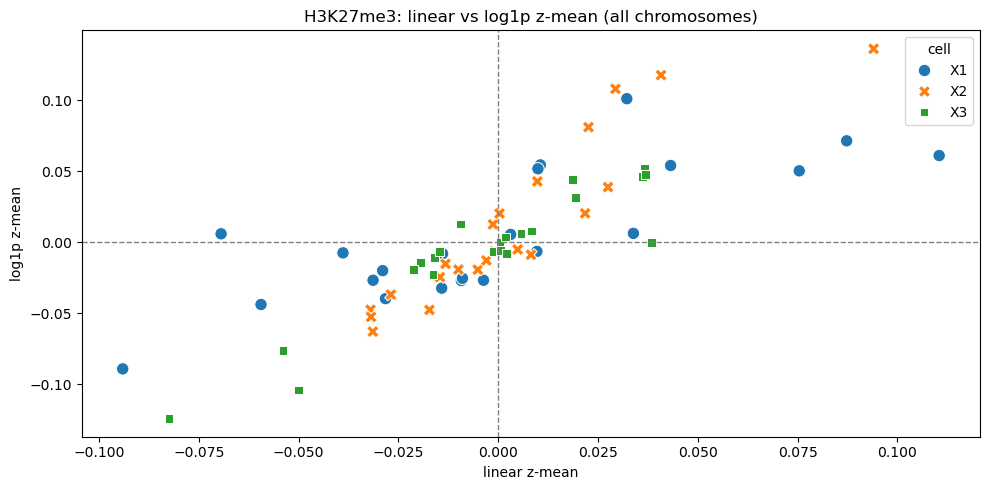

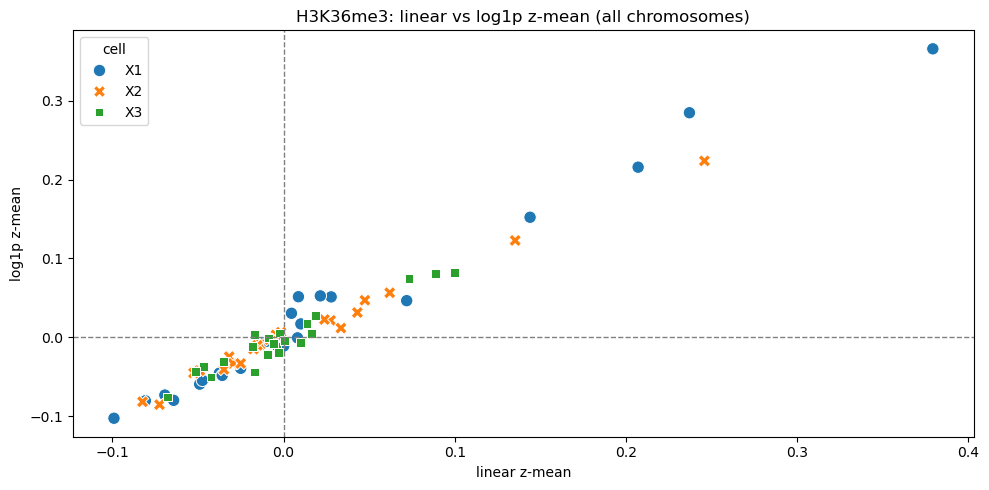

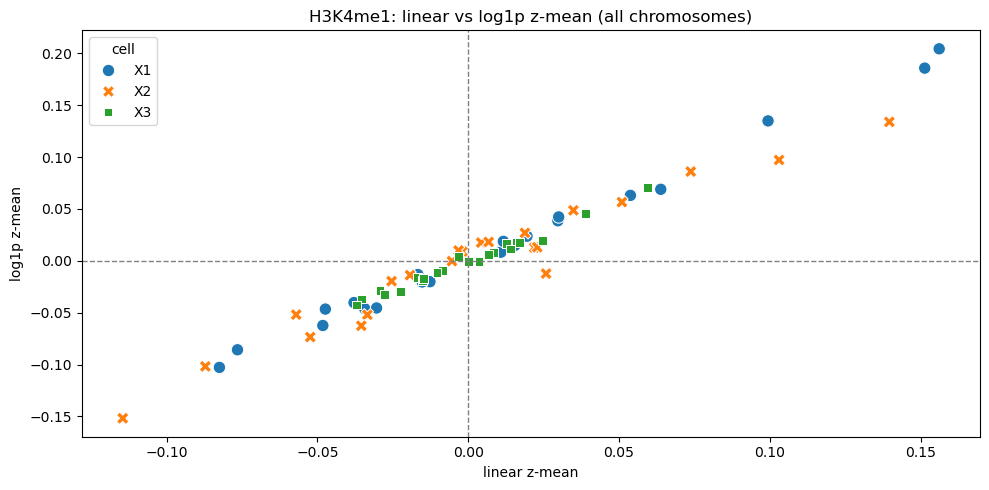

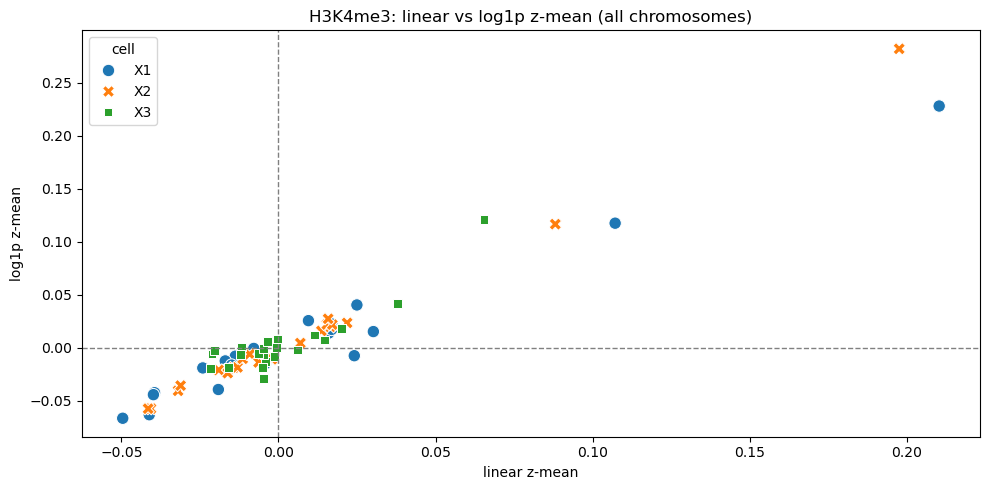

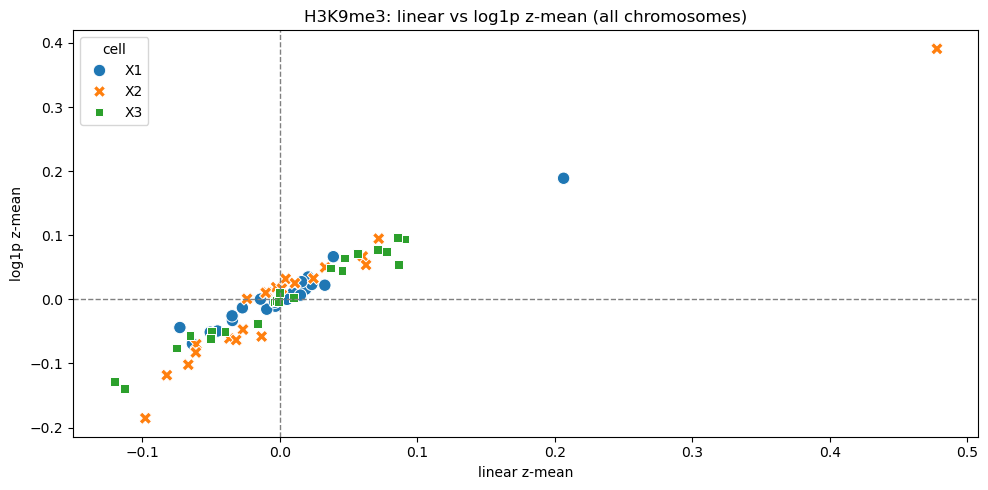

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 載入 global normalization 統計 ===
with open("../preprocessed_data/global_norm_stats.json", "r") as f:
    global_stats = json.load(f)

# === 可用的 normalization 類型（你有 linear 和 log1p）===
norm_types = ["linear", "log1p"]
print(f"📘 Available normalization types: {norm_types}")

# === 初始化欄位 ===
for nt in norm_types:
    df_chr[f"z_mean_{nt}"] = None
    df_chr[f"z_std_{nt}"] = None

# === 對每一列計算多種 normalization ===
for i, row in df_chr.iterrows():
    key = f"{row['mark']}_{row['cell']}"
    if key not in global_stats:
        continue

    for nt in norm_types:
        if nt not in global_stats[key]:
            continue

        gmean = global_stats[key][nt]["mean"]
        gstd = global_stats[key][nt]["std"]

        # 注意：df_chr 的 mean 是 linear_mean 或 log1p_mean
        if nt == "linear":
            local_mean = row.get("linear_mean", row.get("mean"))
            local_std = row.get("linear_std", row.get("std"))
        elif nt == "log1p":
            local_mean = row.get("log1p_mean", None)
            local_std = row.get("log1p_std", None)
        else:
            continue

        if local_mean is None or pd.isna(local_mean):
            continue

        z_mean = (local_mean - gmean) / (gstd + 1e-8)
        z_std = local_std / (gstd + 1e-8) if local_std is not None else None

        df_chr.at[i, f"z_mean_{nt}"] = z_mean
        df_chr.at[i, f"z_std_{nt}"] = z_std

print("✅ 已完成 linear 與 log1p 兩種 z-score 計算")
print(df_chr.head())

# ======================================================
# 📊 視覺化：各 chromosome 的 z-score mean 分佈（雙版本）
# ======================================================
for cell in sorted(df_chr["cell"].unique()):
    df_sub = df_chr[df_chr["cell"] == cell]

    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df_sub,
        x="chr",
        y="z_mean_linear",
        hue="mark",
        marker="o",
        linewidth=2,
        legend=False
    )
    plt.xticks(rotation=45)
    plt.title(f"Linear z-score mean per chromosome ({cell})")
    plt.ylabel("Linear z-score mean")
    plt.xlabel("Chromosome")
    plt.tight_layout()
    plt.show()
for cell in sorted(df_chr["cell"].unique()):
    df_sub = df_chr[df_chr["cell"] == cell]
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df_sub,
        x="chr",
        y="z_mean_log1p",
        hue="mark",
        marker="s",
        linewidth=2
    )
    plt.xticks(rotation=45)
    plt.title(f"log1p z-score mean per chromosome ({cell})")
    plt.ylabel("log1p z-score mean")
    plt.xlabel("Chromosome")
    plt.tight_layout()
    plt.show()

# ======================================================
# 📊 視覺化：比較 linear vs log1p（以每個 mark 為例）
# ======================================================
for mark in sorted(df_chr["mark"].unique()):
    df_sub = df_chr[df_chr["mark"] == mark]

    plt.figure(figsize=(10, 5))
    sns.scatterplot(
        data=df_sub,
        x="z_mean_linear",
        y="z_mean_log1p",
        hue="cell",
        style="cell",
        s=80
    )
    plt.title(f"{mark}: linear vs log1p z-mean (all chromosomes)")
    plt.xlabel("linear z-mean")
    plt.ylabel("log1p z-mean")
    plt.axhline(0, color="gray", ls="--", lw=1)
    plt.axvline(0, color="gray", ls="--", lw=1)
    plt.tight_layout()
    plt.show()


# Predicted data EDA

In [1]:
import pandas as pd

# === 檔案路徑 ===
TRAIN_PATH = "../preprocessed_data/reference/1. merged data/with_y_500_one_side/X1_all_logzscore_logzscore_with_y.tsv"
VAL_PATH   = "../preprocessed_data/reference/1. merged data/with_y_500_one_side/X2_all_logzscore_logzscore_with_y.tsv"

# === 讀取資料 ===
df_train = pd.read_csv(TRAIN_PATH, sep="\t")
df_val   = pd.read_csv(VAL_PATH, sep="\t")

# === 建立 binary 標籤 ===
df_train["gex_binary"] = (df_train["gex"] > 0.0).astype(int)
df_val["gex_binary"]   = (df_val["gex"] > 0.0).astype(int)

# === 統計數量與比例 ===
def summarize_binary(df, name):
    counts = df["gex_binary"].value_counts().sort_index()
    total = counts.sum()
    print(f"\n📊 {name} dataset summary")
    print(f"Total samples: {total}")
    print(f"Class 0 (gex == 0.0): {counts.get(0, 0)} ({counts.get(0, 0)/total:.2%})")
    print(f"Class 1 (gex > 0.0): {counts.get(1, 0)} ({counts.get(1, 0)/total:.2%})")

summarize_binary(df_train, "TRAIN (X1)")
summarize_binary(df_val, "VALID (X2)")



📊 TRAIN (X1) dataset summary
Total samples: 16284
Class 0 (gex == 0.0): 9448 (58.02%)
Class 1 (gex > 0.0): 6836 (41.98%)

📊 VALID (X2) dataset summary
Total samples: 16284
Class 0 (gex == 0.0): 8078 (49.61%)
Class 1 (gex > 0.0): 8206 (50.39%)


## Small test for classification

In [2]:
import os
import random
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix

# ============================================================
#                  GLOBAL REPRODUCIBILITY
# ============================================================
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
print(f"🔒 Global seed set to {SEED}")

# ============================================================
#                  CONFIGURATION
# ============================================================
TRAIN_PATH = "../preprocessed_data/reference/1. merged data/with_y_500_one_side/X1_all_logzscore_logzscore_with_y.tsv"
VAL_PATH   = "../preprocessed_data/reference/1. merged data/with_y_500_one_side/X2_all_logzscore_logzscore_with_y.tsv"

META_COLS = ["gene_name", "chr", "gene_start", "gene_end",
             "TSS_start", "TSS_end", "strand", "gex", "gex_rank"]

# 🟩 改動：我們現在要分類 gex == 0.0 vs > 0.0
TARGET_COL = "gex_binary"

# Chromosomes (autosomes 2–22)
chromosomes = [f"chr{i}" for i in range(2, 23)]
folds = [chromosomes[i::5] for i in range(5)]

print("🧩 Chromosome folds:")
for i, fset in enumerate(folds):
    print(f"Fold {i+1}: {fset}")

# ============================================================
#                  DATA LOADING
# ============================================================
df_train_full = pd.read_csv(TRAIN_PATH, sep="\t")
df_val_full   = pd.read_csv(VAL_PATH, sep="\t")

# 🟩 新增：轉成二元分類標籤
df_train_full[TARGET_COL] = (df_train_full["gex"] > 0.0).astype(int)
df_val_full[TARGET_COL]   = (df_val_full["gex"] > 0.0).astype(int)

feature_cols = [c for c in df_train_full.columns if c not in META_COLS + [TARGET_COL]]
print(f"Feature count: {len(feature_cols)}")

# ============================================================
#                  LIGHTGBM PARAMETERS (分類版)
# ============================================================
params = {
    "objective": "binary",        # 🟩 改成二分類
    "metric": ["auc", "binary_logloss"],
    "verbosity": -1,
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 64,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 3,
    "seed": SEED,
    "deterministic": True,
    "force_row_wise": True,
}

# ============================================================
#                  CROSS-CHROMOSOME TRAINING
# ============================================================
results = []

for fold_idx, val_chrs in enumerate(folds):
    print(f"\n🚀 Fold {fold_idx+1} | Val chromosomes: {val_chrs}")
    
    # -----------------------------
    # Split by chromosome
    # -----------------------------
    train_chrs = [c for c in chromosomes if c not in val_chrs]
    df_train = df_train_full[df_train_full["chr"].isin(train_chrs)].copy()
    df_val   = df_val_full[df_val_full["chr"].isin(val_chrs)].copy()

    # -----------------------------
    # Prepare X, y
    # -----------------------------
    X_train, y_train = df_train[feature_cols], df_train[TARGET_COL]
    X_val, y_val     = df_val[feature_cols], df_val[TARGET_COL]

    # -----------------------------
    # LightGBM Dataset
    # -----------------------------
    dtrain = lgb.Dataset(X_train, label=y_train)
    dval   = lgb.Dataset(X_val, label=y_val, reference=dtrain)

    # -----------------------------
    # Train model
    # -----------------------------
    model = lgb.train(
        params,
        dtrain,
        valid_sets=[dtrain, dval],
        valid_names=["train", "val"],
        num_boost_round=2000,
        callbacks=[
            lgb.early_stopping(stopping_rounds=100),
            lgb.log_evaluation(period=200)
        ],
    )

    # -----------------------------
    # Predictions
    # -----------------------------
    df_val["pred_prob"] = model.predict(X_val, num_iteration=model.best_iteration)
    df_val["pred_label"] = (df_val["pred_prob"] >= 0.4).astype(int)

    # -----------------------------
    # Evaluate Metrics
    # -----------------------------
    auc = roc_auc_score(y_val, df_val["pred_prob"])
    acc = accuracy_score(y_val, df_val["pred_label"])
    f1  = f1_score(y_val, df_val["pred_label"])
    cm  = confusion_matrix(y_val, df_val["pred_label"])

    print(f"\n📈 Fold {fold_idx+1} Results:")
    print(f"   AUC = {auc:.4f}, ACC = {acc:.4f}, F1 = {f1:.4f}")
    print(f"   Confusion matrix:\n{cm}")

    results.append({
        "fold": fold_idx + 1,
        "val_chr": val_chrs,
        "auc": auc,
        "acc": acc,
        "f1": f1
    })

# ============================================================
#                  SUMMARY
# ============================================================
summary_fold = pd.DataFrame(results)
print("\n===== Cross-Chromosome Fold Summary =====")
print(summary_fold)
print(f"\nMean AUC: {summary_fold['auc'].mean():.4f}")
print(f"Mean ACC: {summary_fold['acc'].mean():.4f}")
print(f"Mean F1 : {summary_fold['f1'].mean():.4f}")


🔒 Global seed set to 42
🧩 Chromosome folds:
Fold 1: ['chr2', 'chr7', 'chr12', 'chr17', 'chr22']
Fold 2: ['chr3', 'chr8', 'chr13', 'chr18']
Fold 3: ['chr4', 'chr9', 'chr14', 'chr19']
Fold 4: ['chr5', 'chr10', 'chr15', 'chr20']
Fold 5: ['chr6', 'chr11', 'chr16', 'chr21']
Feature count: 672

🚀 Fold 1 | Val chromosomes: ['chr2', 'chr7', 'chr12', 'chr17', 'chr22']
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.999979	train's binary_logloss: 0.0605642	val's auc: 0.911971	val's binary_logloss: 0.376432
Early stopping, best iteration is:
[125]	train's auc: 0.998679	train's binary_logloss: 0.111224	val's auc: 0.914974	val's binary_logloss: 0.370134

📈 Fold 1 Results:
   AUC = 0.9150, ACC = 0.8281, F1 = 0.8304
   Confusion matrix:
[[1890  490]
 [ 308 1953]]

🚀 Fold 2 | Val chromosomes: ['chr3', 'chr8', 'chr13', 'chr18']
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[99]	train's auc: 0.992212	train's binary_log